In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold,ShuffleSplit
import numpy as np
import random
import pandas as pd
def CreateDataByRatio(data,size):
  # data_new =pd.DataFrame(columns=['label','feature'])
  data_new=[]
  # print(data[['label','feature']])
  data_random=np.array( data[['label','feature','feature_v']])
  random.shuffle(data_random)
  while len(data_new)< size:
    data_new.append(random.choice(data_random))
  return pd.DataFrame(data_new,columns=['label','feature','feature_v'])

In [ ]:

def ReadDataToCsvFile(path_csv_file):
  data=pd.read_csv(path_csv_file,encoding='utf-8', converters={'p_start':eval,'p_temp':eval,'p_end':eval}, index_col=0)
  data['label'] = data['label'].apply(lambda label: -1 if label == False else 1)
  return data


In [ ]:
def GetDataByLabel(data,label):
  dataByLabel =data[data.label==label]
  return dataByLabel

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)

In [ ]:
data=ReadDataToCsvFile('/content/drive/MyDrive/DATA-LUAN_VAN/new_clean_bo3.csv')
data['feature'] = data['p_start'] + data['p_temp'] + data['p_end']
data['feature_v']= None
feature_v=[]
for index, row in data.iterrows():
  feature_v.append([row['p_start'][1],row['p_start'][0],row['p_temp'][1],row['p_temp'][0],row['p_end'][1],row['p_end'][0]])

data['feature_v']=feature_v
data.info()
# data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14861 entries, 0 to 14860
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       14861 non-null  int64 
 1   vehicle_id  14861 non-null  int64 
 2   p_start     14861 non-null  object
 3   p_temp      14861 non-null  object
 4   p_end       14861 non-null  object
 5   pre_routes  14861 non-null  object
 6   freq        14861 non-null  int64 
 7   label       14861 non-null  int64 
 8   regions     14861 non-null  object
 9   feature     14861 non-null  object
 10  feature_v   14861 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


In [ ]:
data

,index,vehicle_id,p_start,p_temp,p_end,pre_routes,freq,label,regions,feature,feature_v
0,0,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.738, 10.8012)","('xa_lộ_hà_nội', 'xa_lộ_hà_nội', 'thảo_điền')",121,-1,"('phường_thảo_điền_quận_2', 'phường_thảo_điền_...","(106.74, 10.8014, 106.73899999999999, 10.8012,...","[10.8014, 106.74, 10.8012, 106.73899999999999,..."
1,16,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.73100000000001, 10.7996)","('xa_lộ_hà_nội', 'xa_lộ_hà_nội', 'cầu_sài_gòn_1')",305,-1,"('phường_thảo_điền_quận_2', 'phường_thảo_điền_...","(106.74, 10.8014, 106.73899999999999, 10.8012,...","[10.8014, 106.74, 10.8012, 106.73899999999999,..."
2,21,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.721, 10.7981)","('xa_lộ_hà_nội', 'xa_lộ_hà_nội', 'điện_biên_phủ')",522,-1,"('phường_thảo_điền_quận_2', 'phường_thảo_điền_...","(106.74, 10.8014, 106.73899999999999, 10.8012,...","[10.8014, 106.74, 10.8012, 106.73899999999999,..."
3,40,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.695, 10.7912)","('xa_lộ_hà_nội', 'xa_lộ_hà_nội', 'võ_thị_sáu')",250,-1,"('phường_thảo_điền_quận_2', 'phường_thảo_điền_...","(106.74, 10.8014, 106.73899999999999, 10.8012,...","[10.8014, 106.74, 10.8012, 106.73899999999999,..."
4,50,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.68799999999999, 10.7858)","('xa_lộ_hà_nội', 'xa_lộ_hà_nội', 'nam_kỳ_khởi_...",127,-1,"('phường_thảo_điền_quận_2', 'phường_thảo_điền_...","(106.74, 10.8014, 106.73899999999999, 10.8012,...","[10.8014, 106.74, 10.8012, 106.73899999999999,..."
...,...,...,...,...,...,...,...,...,...,...,...
14856,7272177,100000533,"(106.682, 10.822000000000001)","(106.679, 10.8284)","(106.677, 10.8429)","('nguyễn_kiệm', 'nguyễn_oanh', 'hẻm_309_nguyễn...",14,1,"('phường_3_none', 'phường_7_none', 'phường_17_...","(106.682, 10.822000000000001, 106.679, 10.8284...","[10.822000000000001, 106.682, 10.8284, 106.679..."
14857,7272544,100000533,"(106.682, 10.8224)","(106.68, 10.8272)","(106.679, 10.8515)","('pham_ngũ_lão', 'quang_trung', 'hà_huy_giáp')",12,1,"('phường_4_none', 'phường_7_none', 'phường_thạ...","(106.682, 10.8224, 106.68, 10.8272, 106.679, 1...","[10.8224, 106.682, 10.8272, 106.68, 10.8515, 1..."
14858,7272961,100000533,"(106.682, 10.8237)","(106.679, 10.8284)","(106.677, 10.8429)","('hẻm_35_phạm_ngũ_lão', 'nguyễn_oanh', 'hẻm_30...",14,1,"('phường_7_none', 'phường_7_none', 'phường_17_...","(106.682, 10.8237, 106.679, 10.8284, 106.677, ...","[10.8237, 106.682, 10.8284, 106.679, 10.8429, ..."
14859,7274155,100000533,"(106.68, 10.8272)","(106.677, 10.8429)","(106.677, 10.8432)","('quang_trung', 'hẻm_309_nguyễn_oanh', 'nguyễn...",14,1,"('phường_7_none', 'phường_17_none', 'phường_17...","(106.68, 10.8272, 106.677, 10.8429, 106.677, 1...","[10.8272, 106.68, 10.8429, 106.677, 10.8432, 1..."


In [ ]:
print(len(data[data.label==1]))
print(len(data[data.label==-1]))

5460
9401


In [ ]:
# ratio test 2:8
# 2 minority
# 8 majority
# data train ratio 0.25% total data
# with total
def GetDataByRatio(total_major,total_minor,ratio_minority,ratio_majority):
  n=round(total_major/total_minor,1)
  print("n" ,n)
  n1=round(ratio_majority/ratio_minority,1)
  print("n1" ,n1)
  if n==n1:
    print("case1")
    return round(total_minor,0),round(total_major,0)
  elif n>n1:
    # giam da so dat ti le
    print("case2")
    return int(total_minor),int((total_minor)*n1)
  else:
    print("case3")
    return int((total_major)/n1) ,int(total_major)


In [ ]:
# da so
total_major=len(data[data.label==-1])
# thieu so
total_minor=len(data[data.label==1])
total_minority_train,total_majority_train=GetDataByRatio(total_major,total_minor,1,100)
print("total_minority_train",total_minority_train)
print("total_minor",total_minor)
print("total_major",total_major)
print("total_majority_train",total_majority_train)
print("total_minority_train",total_minority_train)
print("ti le",total_majority_train/total_minority_train)

n 1.7
n1 100.0
case3
total_minority_train 94
total_minor 5460
total_major 9401
total_majority_train 9401
total_minority_train 94
ti le 100.01063829787235


In [ ]:
# nhom thieu so
data_minority =data[data.label==1]
# nhom da so
data_majority =data[data.label==-1]
data_minor=CreateDataByRatio(data_minority,total_minority_train)
# print(len(data_minor[data_minor.label==-1]))
data_major=CreateDataByRatio(data_majority,total_majority_train)
print("data_major",len(data_major))
print("data_minor",len(data_minor))
# print(data_major)
# data_new=data_minor.join(data_major)
data_new=data_minor.append(data_major)
print("data_new",len(data_new))
print(len(data_major[data_major.label==1]))

data_major 9401
data_minor 94
data_new 9495
0


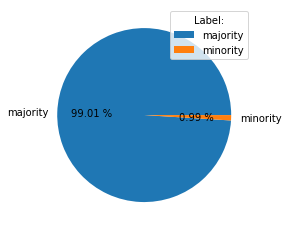

In [ ]:
# df_grouped1 = data_new.groupby('vehicle_id')[['label']].max()
import matplotlib.pyplot as plt
import numpy as np
y = np.array([9401, 94])
labels =['majority','minority']
plt.pie(y, labels = labels,autopct='%.2f %%')
plt.legend(title = "Label:")
plt.show()
# data_new.label.value_counts().plot.pie(autopct='%.2f %%')

In [ ]:
import sklearn.metrics
import math
def matrix_metrix(y_true, y_pred,beta):
   CM = confusion_matrix(y_true,y_pred)
   TN = CM[0][0]
   FN = CM[1][0]
   TP = CM[1][1]
   FP = CM[0][1]
   Population = TN+FN+TP+FP
   Prevalence = round( (TP+FP) / Population,2)
   Accuracy   = round( (TP+TN) / Population,4)
   Precision  = round( TP / (TP+FP),4 )
   NPV        = round( TN / (TN+FN),4 )
   FDR        = round( FP / (TP+FP),4 )
   FOR        = round( FN / (TN+FN),4 )
   check_Pos  = Precision + FDR
   check_Neg  = NPV + FOR
   Recall     = round( TP / (TP+FN),4 )
   FPR        = round( FP / (TN+FP),4 )
   FNR        = round( FN / (TP+FN),4 )
   TNR        = round( TN / (TN+FP),4 )
   check_Pos2 = Recall + FNR
   check_Neg2 = FPR + TNR
   LRPos      = round( Recall/FPR,4 )
   LRNeg      = round( FNR / TNR ,4 )
   DOR        =0 # round( LRPos/LRNeg)
   F1         = round ( 2 * ((Precision*Recall)/(Precision+Recall)),4)
   FBeta      = round ( (1+beta**2)*((Precision*Recall)/((beta**2 * Precision)+ Recall)) ,4)
   MCC        = round ( ((TP*TN)-(FP*FN))/math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))  ,4)
   BM         = Recall+TNR-1
   MK         = Precision+NPV-1
   mat_met = pd.DataFrame({
'Metric':['TP','TN','FP','FN','Prevalence','Accuracy','Precision','NPV','FDR','FOR','check_Pos','check_Neg','Recall','FPR','FNR','TNR','check_Pos2','check_Neg2','LR+','LR-','DOR','F1','FBeta','MCC','BM','MK'],     'Value':[TP,TN,FP,FN,Prevalence,Accuracy,Precision,NPV,FDR,FOR,check_Pos,check_Neg,Recall,FPR,FNR,TNR,check_Pos2,check_Neg2,LRPos,LRNeg,DOR,F1,FBeta,MCC,BM,MK]})
   return (mat_met)

In [ ]:
from sklearn.metrics import classification_report,f1_score, confusion_matrix,recall_score, accuracy_score,precision_score, precision_recall_fscore_support,roc_auc_score, roc_curve, auc
from imblearn.metrics import geometric_mean_score,sensitivity_score,specificity_score
import seaborn as sn

import matplotlib.pyplot as plt
def clf_report(y_true, y_pred):
    print(classification_report(y_true, y_pred, target_names=['Normal','Anomaly']))
    cm = confusion_matrix(y_true,y_pred, labels=[-1,1])
    print(cm)
    df_cm = pd.DataFrame(cm,columns = ['Normal','Anomaly'])
    df_cm = df_cm.rename(index = {0:'Normal',1:'Anomaly'})
    sn.heatmap(df_cm, annot=True, fmt="d")
    plt.show()
    print('Precision score',precision_score(y_pred,y_true))
    print('accuracy score',accuracy_score(y_pred,y_true))
    print('Recall score',recall_score(y_pred,y_true))
    print('G-mean score',geometric_mean_score(y_pred,y_true))
    print('F1 score',f1_score(y_pred,y_true))
    print('sensitivity_score',sensitivity_score(y_true, y_pred, average='macro'))
    print('specificity_score',specificity_score(y_true, y_pred, average='macro'))
    print('Weighted accuracy',0.5*sensitivity_score(y_true, y_pred, average='macro')+0.5* specificity_score(y_true, y_pred, average='macro'))
    print('F-statistics',(2*precision_score(y_pred,y_true)*sensitivity_score(y_true, y_pred, average='macro'))/(precision_score(y_pred,y_true)+sensitivity_score(y_true, y_pred, average='macro')))
    beta = 0.4
    mat_met = matrix_metrix(y_true,y_pred,beta)
    print (mat_met)
    return precision_recall_fscore_support(y_true,y_pred,average='macro')

In [ ]:
def clf_roc_auc(y_true,y_pred, y_proba):
  svm_roc_auc=roc_auc_score(y_true,y_pred)
  fpr,tpr,thresholds=roc_curve(y_true,y_proba)
  plt.figure()
  plt.plot(fpr,tpr,label='AUC = %0.2f'%auc(fpr,tpr))
  plt.plot([0,1],[0,1],'r--')
  plt.xlim([0.0,1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('Receiver operating characteristic (ROC)')
  plt.legend(loc='lower right')
  plt.show()

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter
from sklearn import decomposition
# vectorizer = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)
# clf = SVC(C=5.0, kernel='rbf', tol=1e-5, max_iter=-1, random_state=42,probability=False)
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# X=np.array(data_new['feature_v'].tolist())
# y=data_new['label']


X=np.array(data_new['feature_v'].tolist())
y=data_new['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# X_train_m = vectorizer.fit_transform(X_train)
# X_train_m=vectorizer.transform(X_train_m)
# X_test_m=vectorizer.fit_transform(X_test)
# X_test_m = vectorizer.transform(X_test)


X_train_PCA=X_train
X_test_PCA=X_test
pca = decomposition.PCA(n_components=3)
pca.fit(X_train_PCA)
X_train_PCA = pca.transform(X_train_PCA)

pca.fit(X_test_PCA)
X_test_PCA = pca.transform(X_test_PCA)
# print(X_train_PCA.shape)


print(X_test.shape)
print(X_train.shape)
print(X_test_PCA.shape)
print(X_train_PCA.shape)
# X_train_m = vectorizer.fit_transform(X_train)
# X_test_m = vectorizer.transform(X_test)
X_train_m=X_train_PCA
X_test_m=X_test_PCA


(2374, 6)
(7121, 6)
(2374, 3)
(7121, 3)


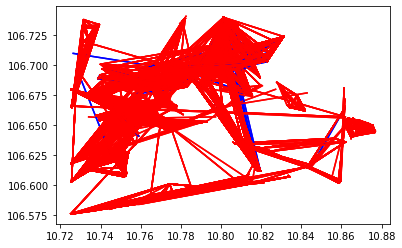

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def report_line(X,y):
  y_cor=[]
  for item in y:
    if item==-1:
      y_cor.append('red')
    else:
      y_cor.append('blue')
  i=1
  i=0
  for x in X:
    plt.plot([x[0],x[2],x[4]], [x[1],x[3],x[5]], '-r',color=y_cor[i])
    plt.plot([x[0],x[2],x[4]], [x[1],x[3],x[5]], '-r',color=y_cor[i])
    i=i+1

report_line(X_train,y_train)

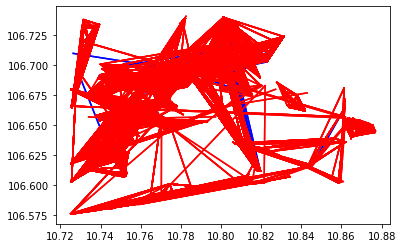

In [ ]:
report_line(X,y)

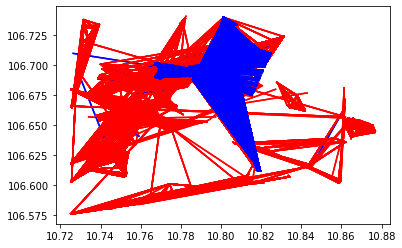

In [ ]:
oversample = BorderlineSMOTE(kind='borderline-1',k_neighbors=7,m_neighbors=15)
X_Borderline, y_Borderline = oversample.fit_resample(X_train, y_train)
report_line(X_Borderline,y_Borderline)
# X_train
# X_Borderline

              precision    recall  f1-score   support

      Normal       0.98      1.00      0.99      2338
     Anomaly       0.00      0.00      0.00        36

    accuracy                           0.98      2374
   macro avg       0.49      0.50      0.50      2374
weighted avg       0.97      0.98      0.98      2374

[[2338    0]
 [  36    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


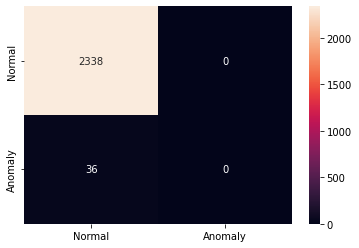

Precision score 0.0
accuracy score 0.9848357203032856
Recall score 0.0
G-mean score 0.0
F1 score 0.0
sensitivity_score 0.5
specificity_score 0.5
Weighted accuracy 0.5
F-statistics 0.0
        Metric      Value
0           TP     0.0000
1           TN  2338.0000
2           FP     0.0000
3           FN    36.0000
4   Prevalence     0.0000
5     Accuracy     0.9848
6    Precision        NaN
7          NPV     0.9848
8          FDR        NaN
9          FOR     0.0152
10   check_Pos        NaN
11   check_Neg     1.0000
12      Recall     0.0000
13         FPR     0.0000
14         FNR     1.0000
15         TNR     1.0000
16  check_Pos2     1.0000
17  check_Neg2     1.0000
18         LR+        NaN
19         LR-     1.0000
20         DOR     0.0000
21          F1        NaN
22       FBeta        NaN
23         MCC        NaN
24          BM     0.0000
25          MK        NaN


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in long_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-

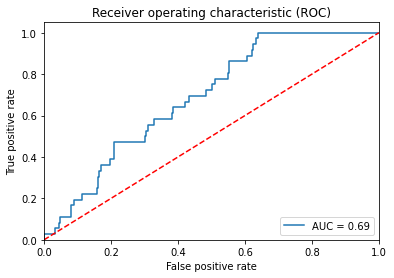

In [ ]:
from sklearn.svm import LinearSVC, SVC
clf = SVC(C=5.0, kernel='rbf', tol=1e-5, max_iter=-1, random_state=42,probability=True)

clf.fit(X_train_m,y_train)
# clf1.fit(X_train,y_train)
y_train_pred = clf.predict(X_train_m)
y_pred=clf.predict(X_test_m)
y_proba=clf.predict_proba(X_test_m)

# precision,recall,fscore,support = clf_report(y_train,y_train_pred)

precision,recall,fscore,support = clf_report(y_test,y_pred)
# beta = 0.4
# mat_met = matrix_metrix(recall,precision,beta)
# print (mat_met)
clf_roc_auc(y_test,y_pred,y_proba[:,1])

              precision    recall  f1-score   support

      Normal       0.99      0.78      0.88      2338
     Anomaly       0.04      0.58      0.07        36

    accuracy                           0.78      2374
   macro avg       0.52      0.68      0.48      2374
weighted avg       0.98      0.78      0.86      2374



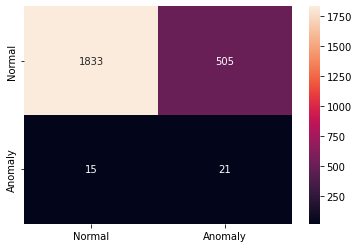

Precision score 0.5833333333333334
accuracy score 0.780960404380792
Recall score 0.039923954372623575
G-mean score 0.19899722686866073
F1 score 0.07473309608540926


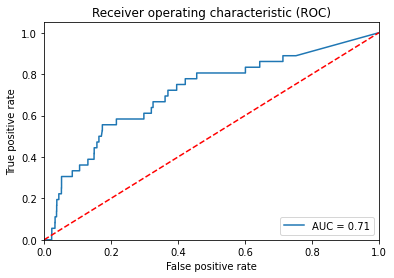

In [ ]:
from sklearn.svm import LinearSVC, SVC
# ,probability=True
clf = SVC(C=5.0, kernel='rbf', tol=1e-5, max_iter=-1, random_state=42,probability=True)
oversample = BorderlineSMOTE(kind='borderline-1')
# X_train = vectorizer.fit_transform(X_train)
# X_test = vectorizer.transform(X_test)
X_Borderline, y_Borderline = oversample.fit_resample(X_train_m, y_train)

clf.fit(X_Borderline,y_Borderline)

y_train_pred = clf.predict(X_Borderline)
y_pred=clf.predict(X_test_m)
y_proba=clf.predict_proba(X_test_m)

# precision,recall,fscore,support = clf_report(y_Borderline,y_train_pred)
precision,recall,fscore,support = clf_report(y_test,y_pred)
clf_roc_auc(y_test,y_pred,y_proba[:,1])

In [ ]:
# find k_neighborsint good
clf = SVC(C=5.0, kernel='rbf', tol=1e-5, max_iter=-1, random_state=42,probability=True)
i=0
G_mean_score_max=0
ks= np.array([2,3,4,5,6,7,8,9,10])
while(True):
  k=random.choice(ks)
  oversample = BorderlineSMOTE(kind='borderline-1',k_neighbors=k)
  X_Borderline, y_Borderline = oversample.fit_resample(X_train, y_train)

  clf.fit(X_Borderline,y_Borderline)

  # y_train_pred = clf.predict(X_Borderline)
  y_pred=clf.predict(X_test)
  # y_proba=clf.predict_proba(X_test)

  # precision,recall,fscore,support = clf_report(y_Borderline,y_train_pred)
  print('------k=',k)

  G_mean_score=geometric_mean_score(y_test,y_pred)
  if G_mean_score > G_mean_score_max:
    G_mean_score_max=G_mean_score
  print('G-mean score',G_mean_score)
  if G_mean_score_max >0.51 or i==5:
    quit()
  i=i+1
print('G-mean score max',G_mean_score_max)

  # precision,recall,fscore,support = clf_report(y_test,y_pred)
  # clf_roc_auc(y_test,y_pred,y_proba[:,1])

              precision    recall  f1-score   support

      Normal       0.93      0.87      0.89      7063
     Anomaly       0.73      0.84      0.78      3041

    accuracy                           0.86     10104
   macro avg       0.83      0.85      0.84     10104
weighted avg       0.87      0.86      0.86     10104

[[6122  941]
 [ 496 2545]]


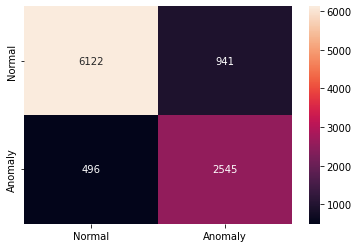

Precision score 0.8368957579743506
accuracy score 0.8577790973871734
Recall score 0.7300631095811819
G-mean score 0.8217949784040232
F1 score 0.779837597671212
sensitivity_score 0.8518331260493301
specificity_score 0.8518331260493301
Weighted accuracy 0.8518331260493301
F-statistics 0.8442983790199894
        Metric      Value
0           TP  2545.0000
1           TN  6122.0000
2           FP   941.0000
3           FN   496.0000
4   Prevalence     0.3500
5     Accuracy     0.8578
6    Precision     0.7301
7          NPV     0.9251
8          FDR     0.2699
9          FOR     0.0749
10   check_Pos     1.0000
11   check_Neg     1.0000
12      Recall     0.8369
13         FPR     0.1332
14         FNR     0.1631
15         TNR     0.8668
16  check_Pos2     1.0000
17  check_Neg2     1.0000
18         LR+     6.2830
19         LR-     0.1882
20         DOR     0.0000
21          F1     0.7799
22       FBeta     0.7432
23         MCC     0.6790
24          BM     0.7037
25          MK     0.

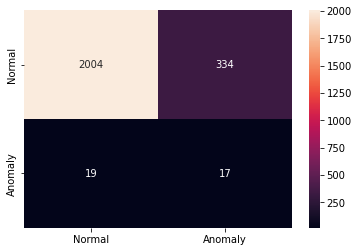

Precision score 0.4722222222222222
accuracy score 0.8513058129738837
Recall score 0.04843304843304843
G-mean score 0.21903918741911105
F1 score 0.08785529715762275
sensitivity_score 0.6646825396825397
specificity_score 0.6646825396825397
Weighted accuracy 0.6646825396825397
F-statistics 0.5521621097537328
        Metric      Value
0           TP    17.0000
1           TN  2004.0000
2           FP   334.0000
3           FN    19.0000
4   Prevalence     0.1500
5     Accuracy     0.8513
6    Precision     0.0484
7          NPV     0.9906
8          FDR     0.9516
9          FOR     0.0094
10   check_Pos     1.0000
11   check_Neg     1.0000
12      Recall     0.4722
13         FPR     0.1429
14         FNR     0.5278
15         TNR     0.8571
16  check_Pos2     1.0000
17  check_Neg2     1.0000
18         LR+     3.3044
19         LR-     0.6158
20         DOR     0.0000
21          F1     0.0878
22       FBeta     0.0552
23         MCC     0.1134
24          BM     0.3293
25          MK   

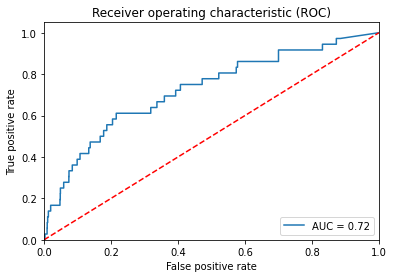

In [ ]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SVMSMOTE
oversample = SVMSMOTE()
X_svm, y_svm = oversample.fit_resample(X_train_m, y_train)

clf = SVC(C=5.0, kernel='rbf', tol=1e-5, max_iter=-1, random_state=42,probability=True)
clf.fit(X_svm,y_svm)
y_train_pred = clf.predict(X_svm)
y_pred=clf.predict(X_test_m)
y_proba=clf.predict_proba(X_test_m)

precision,recall,fscore,support = clf_report(y_svm,y_train_pred)
precision,recall,fscore,support = clf_report(y_test,y_pred)
clf_roc_auc(y_test,y_pred,y_proba[:,1])


              precision    recall  f1-score   support

      Normal       0.89      0.70      0.79      7063
     Anomaly       0.75      0.91      0.83      7050

    accuracy                           0.81     14113
   macro avg       0.82      0.81      0.81     14113
weighted avg       0.82      0.81      0.81     14113

[[4969 2094]
 [ 610 6440]]


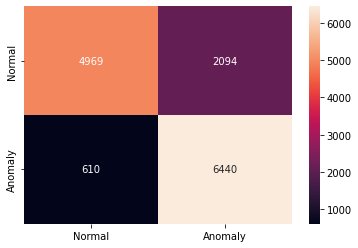

Precision score 0.9134751773049645
accuracy score 0.8084035995181748
Recall score 0.7546285446449497
G-mean score 0.8198283495558033
F1 score 0.8264887063655031
sensitivity_score 0.8085002957174687
specificity_score 0.8085002957174687
Weighted accuracy 0.8085002957174687
F-statistics 0.8577880028515475
        Metric      Value
0           TP  6440.0000
1           TN  4969.0000
2           FP  2094.0000
3           FN   610.0000
4   Prevalence     0.6000
5     Accuracy     0.8084
6    Precision     0.7546
7          NPV     0.8907
8          FDR     0.2454
9          FOR     0.1093
10   check_Pos     1.0000
11   check_Neg     1.0000
12      Recall     0.9135
13         FPR     0.2965
14         FNR     0.0865
15         TNR     0.7035
16  check_Pos2     1.0000
17  check_Neg2     1.0000
18         LR+     3.0809
19         LR-     0.1230
20         DOR     0.0000
21          F1     0.8265
22       FBeta     0.7731
23         MCC     0.6310
24          BM     0.6170
25          MK     0

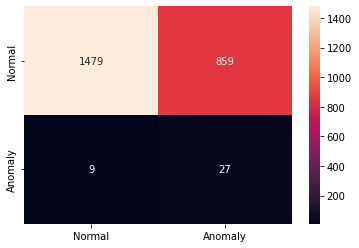

Precision score 0.75
accuracy score 0.6343723673125526
Recall score 0.030474040632054177
G-mean score 0.1740394261019861
F1 score 0.05856832971800434
sensitivity_score 0.6912959794696322
specificity_score 0.6912959794696322
Weighted accuracy 0.6912959794696322
F-statistics 0.7194524816381036
        Metric      Value
0           TP    27.0000
1           TN  1479.0000
2           FP   859.0000
3           FN     9.0000
4   Prevalence     0.3700
5     Accuracy     0.6344
6    Precision     0.0305
7          NPV     0.9940
8          FDR     0.9695
9          FOR     0.0060
10   check_Pos     1.0000
11   check_Neg     1.0000
12      Recall     0.7500
13         FPR     0.3674
14         FNR     0.2500
15         TNR     0.6326
16  check_Pos2     1.0000
17  check_Neg2     1.0000
18         LR+     2.0414
19         LR-     0.3952
20         DOR     0.0000
21          F1     0.0586
22       FBeta     0.0352
23         MCC     0.0967
24          BM     0.3826
25          MK     0.0245


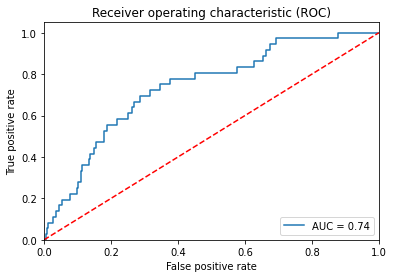

In [ ]:
from imblearn.over_sampling import ADASYN
oversample = ADASYN()
X_ADASYN, y_ADASYN = oversample.fit_resample(X_train_m, y_train)
clf = SVC(C=5.0, kernel='rbf', tol=1e-5, max_iter=-1, random_state=42,probability=True)
clf.fit(X_ADASYN,y_ADASYN)
y_train_pred = clf.predict(X_ADASYN)
y_pred=clf.predict(X_test_m)
y_proba=clf.predict_proba(X_test_m)

precision,recall,fscore,support = clf_report(y_ADASYN,y_train_pred)
precision,recall,fscore,support = clf_report(y_test,y_pred)
clf_roc_auc(y_test,y_pred,y_proba[:,1])


Counter({-1: 7063, 1: 58})
Counter({-1: 7063, 1: 7063})
              precision    recall  f1-score   support

      Normal       0.99      0.63      0.77      2338
     Anomaly       0.03      0.75      0.06        36

    accuracy                           0.63      2374
   macro avg       0.51      0.69      0.42      2374
weighted avg       0.98      0.63      0.76      2374

[[1477  861]
 [   9   27]]


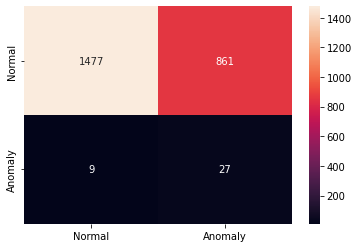

Precision score 0.75
accuracy score 0.6335299073294018
Recall score 0.030405405405405407
G-mean score 0.17384261338537407
F1 score 0.058441558441558454
sensitivity_score 0.6908682634730539
specificity_score 0.6908682634730539
Weighted accuracy 0.6908682634730539
F-statistics 0.7192207792207791
        Metric      Value
0           TP    27.0000
1           TN  1477.0000
2           FP   861.0000
3           FN     9.0000
4   Prevalence     0.3700
5     Accuracy     0.6335
6    Precision     0.0304
7          NPV     0.9939
8          FDR     0.9696
9          FOR     0.0061
10   check_Pos     1.0000
11   check_Neg     1.0000
12      Recall     0.7500
13         FPR     0.3683
14         FNR     0.2500
15         TNR     0.6317
16  check_Pos2     1.0000
17  check_Neg2     1.0000
18         LR+     2.0364
19         LR-     0.3958
20         DOR     0.0000
21          F1     0.0584
22       FBeta     0.0350
23         MCC     0.0964
24          BM     0.3817
25          MK     0.0243


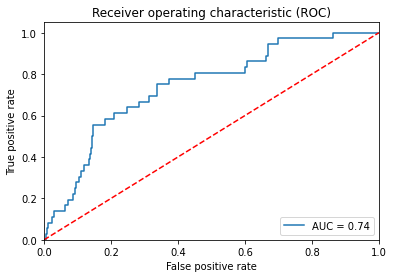

In [ ]:
from sklearn.svm import LinearSVC, SVC
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.under_sampling import NearMiss
from  sklearn.calibration  import CalibratedClassifierCV
from imblearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import TomekLinks
model = DecisionTreeClassifier()
from imblearn.over_sampling import ADASYN

# G_mean_score=geometric_mean_score(y_test,y_pred)
print(Counter(y_train))
ratio =0.8
model = DecisionTreeClassifier()
count_over=int(ratio*7063)
# pipe1 = make_pipeline(SMOTE(sampling_strategy={1: 6000}), ADASYN(sampling_strategy={-1: 7063}))
# pipe1 = make_pipeline(SMOTE(sampling_strategy={1: count_over},k_neighbors=4), RandomUnderSampler(sampling_strategy={-1:7063}))
# X_over, y_over = pipe1.fit_resample(X_train_m, y_train)
oversample = SMOTE(random_state=42,k_neighbors=5)
X_over, y_over = oversample.fit_resample(X_train_m, y_train)
print(Counter(y_over))
clf = SVC(C=5.0, kernel='rbf', tol=1e-5, max_iter=-1, random_state=42,probability=True)
clf.fit(X_over,y_over)
y_train_pred = clf.predict(X_over)

y_pred=clf.predict(X_test_m)
y_proba=clf.predict_proba(X_test_m)
# precision,recall,fscore,support = clf_report(y_over,y_train_pred)
precision,recall,fscore,support = clf_report(y_test,y_pred)
clf_roc_auc(y_test,y_pred,y_proba[:,1])

Counter({-1: 7063, 1: 58})
Counter({-1: 7063, 1: 7063})
              precision    recall  f1-score   support

      Normal       0.99      0.63      0.77      2338
     Anomaly       0.03      0.75      0.06        36

    accuracy                           0.63      2374
   macro avg       0.51      0.69      0.42      2374
weighted avg       0.98      0.63      0.76      2374

[[1477  861]
 [   9   27]]


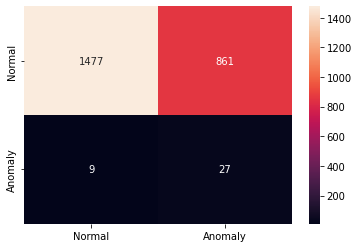

Precision score 0.75
accuracy score 0.6335299073294018
Recall score 0.030405405405405407
G-mean score 0.17384261338537407
F1 score 0.058441558441558454
sensitivity_score 0.6908682634730539
specificity_score 0.6908682634730539
Weighted accuracy 0.6908682634730539
F-statistics 0.7192207792207791
        Metric      Value
0           TP    27.0000
1           TN  1477.0000
2           FP   861.0000
3           FN     9.0000
4   Prevalence     0.3700
5     Accuracy     0.6335
6    Precision     0.0304
7          NPV     0.9939
8          FDR     0.9696
9          FOR     0.0061
10   check_Pos     1.0000
11   check_Neg     1.0000
12      Recall     0.7500
13         FPR     0.3683
14         FNR     0.2500
15         TNR     0.6317
16  check_Pos2     1.0000
17  check_Neg2     1.0000
18         LR+     2.0364
19         LR-     0.3958
20         DOR     0.0000
21          F1     0.0584
22       FBeta     0.0350
23         MCC     0.0964
24          BM     0.3817
25          MK     0.0243


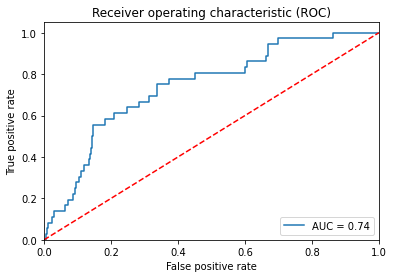

In [ ]:
from sklearn.svm import LinearSVC, SVC
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.under_sampling import NearMiss
from  sklearn.calibration  import CalibratedClassifierCV
from imblearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import TomekLinks
model = DecisionTreeClassifier()
from imblearn.over_sampling import ADASYN

# G_mean_score=geometric_mean_score(y_test,y_pred)
print(Counter(y_train))
ratio =0.8
model = DecisionTreeClassifier()
count_over=int(ratio*7063)
# pipe1 = make_pipeline(SMOTE(sampling_strategy={1: 6000}), ADASYN(sampling_strategy={-1: 7063}))
pipe1 = make_pipeline(SMOTE(sampling_strategy={1: count_over*0.7},k_neighbors=5), TomekLinks(sampling_strategy={-1:count_over*0.9}))
# X_over, y_over = pipe1.fit_resample(X_train_m, y_train)
# oversample = SMOTE(random_state=42,k_neighbors=5)
# X_over, y_over = oversample.fit_resample(X_train_m, y_train)
print(Counter(y_over))
clf = SVC(C=5.0, kernel='rbf', tol=1e-5, max_iter=-1, random_state=42,probability=True)
clf.fit(X_over,y_over)
y_train_pred = clf.predict(X_over)

y_pred=clf.predict(X_test_m)
y_proba=clf.predict_proba(X_test_m)
# precision,recall,fscore,support = clf_report(y_over,y_train_pred)
precision,recall,fscore,support = clf_report(y_test,y_pred)
clf_roc_auc(y_test,y_pred,y_proba[:,1])

              precision    recall  f1-score   support

      Normal       0.98      1.00      0.99      2338
     Anomaly       0.00      0.00      0.00        36

    accuracy                           0.98      2374
   macro avg       0.49      0.50      0.50      2374
weighted avg       0.97      0.98      0.98      2374

[[2338    0]
 [  36    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


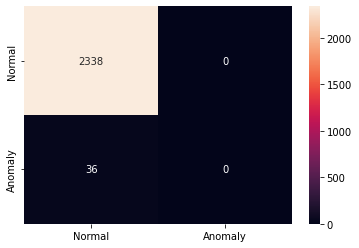

Precision score 0.0
accuracy score 0.9848357203032856
Recall score 0.0
G-mean score 0.0
F1 score 0.0
sensitivity_score 0.5
specificity_score 0.5
Weighted accuracy 0.5
F-statistics 0.0
        Metric      Value
0           TP     0.0000
1           TN  2338.0000
2           FP     0.0000
3           FN    36.0000
4   Prevalence     0.0000
5     Accuracy     0.9848
6    Precision        NaN
7          NPV     0.9848
8          FDR        NaN
9          FOR     0.0152
10   check_Pos        NaN
11   check_Neg     1.0000
12      Recall     0.0000
13         FPR     0.0000
14         FNR     1.0000
15         TNR     1.0000
16  check_Pos2     1.0000
17  check_Neg2     1.0000
18         LR+        NaN
19         LR-     1.0000
20         DOR     0.0000
21          F1        NaN
22       FBeta        NaN
23         MCC        NaN
24          BM     0.0000
25          MK        NaN


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in long_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-

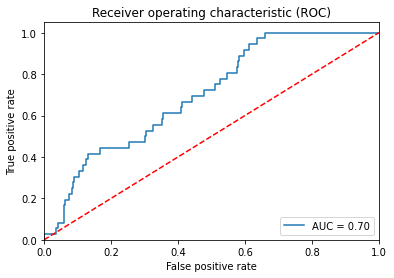

In [ ]:
from imblearn.under_sampling import TomekLinks
from  sklearn.calibration  import CalibratedClassifierCV
TomekLink = TomekLinks(sampling_strategy='majority')
X_over, y_over = TomekLink.fit_resample(X_train_m, y_train)
clf = SVC(C=5.0, kernel='rbf', tol=1e-5, max_iter=-1, random_state=42,probability=True)
clf.fit(X_over,y_over)
y_train_pred = clf.predict(X_over)

y_pred=clf.predict(X_test_m)
y_proba=clf.predict_proba(X_test_m)
# precision,recall,fscore,support = clf_report(y_over,y_train_pred)
precision,recall,fscore,support = clf_report(y_test,y_pred)
clf_roc_auc(y_test,y_pred,y_proba[:,1])

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from  sklearn.calibration  import CalibratedClassifierCV
TomekLink = RandomUnderSampler(andom_state=42)
X_over, y_over = RandomUnderSampler.fit_resample(X_train_m, y_train)
clf = SVC(C=5.0, kernel='rbf', tol=1e-5, max_iter=-1, random_state=42,probability=True)
clf.fit(X_over,y_over)
y_train_pred = clf.predict(X_over)

y_pred=clf.predict(X_test_m)
y_proba=clf.predict_proba(X_test_m)
# precision,recall,fscore,support = clf_report(y_over,y_train_pred)
precision,recall,fscore,support = clf_report(y_test,y_pred)
clf_roc_auc(y_test,y_pred,y_proba[:,1])

TypeError: ignored

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Normal       0.99      1.00      1.00      6975
     Anomaly       0.00      0.00      0.00        58

    accuracy                           0.99      7033
   macro avg       0.50      0.50      0.50      7033
weighted avg       0.98      0.99      0.99      7033

[[6975    0]
 [  58    0]]


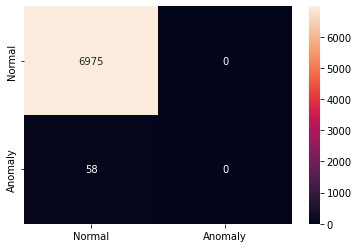

Precision score 0.0
accuracy score 0.9917531636570454
Recall score 0.0
G-mean score 0.0
F1 score 0.0
sensitivity_score 0.5
specificity_score 0.5
Weighted accuracy 0.5
F-statistics 0.0
        Metric      Value
0           TP     0.0000
1           TN  6975.0000
2           FP     0.0000
3           FN    58.0000
4   Prevalence     0.0000
5     Accuracy     0.9918
6    Precision        NaN
7          NPV     0.9918
8          FDR        NaN
9          FOR     0.0082
10   check_Pos        NaN
11   check_Neg     1.0000
12      Recall     0.0000
13         FPR     0.0000
14         FNR     1.0000
15         TNR     1.0000
16  check_Pos2     1.0000
17  check_Neg2     1.0000
18         LR+        NaN
19         LR-     1.0000
20         DOR     0.0000
21          F1        NaN
22       FBeta        NaN
23         MCC        NaN
24          BM     0.0000
25          MK        NaN
              precision    recall  f1-score   support

      Normal       0.98      1.00      0.99      2338
     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in long_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-

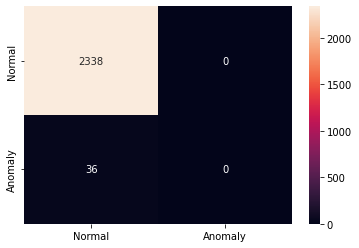

Precision score 0.0
accuracy score 0.9848357203032856
Recall score 0.0
G-mean score 0.0
F1 score 0.0
sensitivity_score 0.5
specificity_score 0.5
Weighted accuracy 0.5
F-statistics 0.0
        Metric      Value
0           TP     0.0000
1           TN  2338.0000
2           FP     0.0000
3           FN    36.0000
4   Prevalence     0.0000
5     Accuracy     0.9848
6    Precision        NaN
7          NPV     0.9848
8          FDR        NaN
9          FOR     0.0152
10   check_Pos        NaN
11   check_Neg     1.0000
12      Recall     0.0000
13         FPR     0.0000
14         FNR     1.0000
15         TNR     1.0000
16  check_Pos2     1.0000
17  check_Neg2     1.0000
18         LR+        NaN
19         LR-     1.0000
20         DOR     0.0000
21          F1        NaN
22       FBeta        NaN
23         MCC        NaN
24          BM     0.0000
25          MK        NaN


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in long_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-

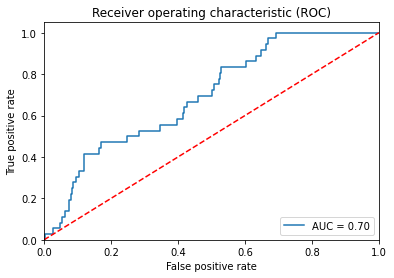

In [ ]:
from imblearn.under_sampling import EditedNearestNeighbours
from  sklearn.calibration  import CalibratedClassifierCV
enn = EditedNearestNeighbours(sampling_strategy='majority')
X_over, y_over = enn.fit_resample(X_train_m, y_train)
clf = SVC(C=5.0, kernel='rbf', tol=1e-5, max_iter=-1, random_state=42,probability=True)
clf.fit(X_over,y_over)
y_train_pred = clf.predict(X_over)

y_pred=clf.predict(X_test_m)
y_proba=clf.predict_proba(X_test_m)
precision,recall,fscore,support = clf_report(y_over,y_train_pred)
precision,recall,fscore,support = clf_report(y_test,y_pred)
clf_roc_auc(y_test,y_pred,y_proba[:,1])

              precision    recall  f1-score   support

      Normal       0.91      0.65      0.76      7063
     Anomaly       0.73      0.94      0.82      7063

    accuracy                           0.79     14126
   macro avg       0.82      0.79      0.79     14126
weighted avg       0.82      0.79      0.79     14126

[[4588 2475]
 [ 459 6604]]


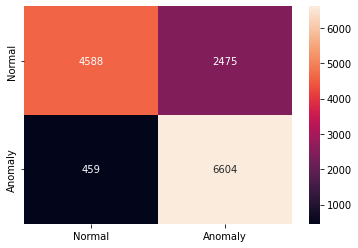

Precision score 0.9350134503751947
accuracy score 0.7922978904148379
Recall score 0.7273928846789294
G-mean score 0.8131666830787975
F1 score 0.8182381365382232
sensitivity_score 0.7922978904148379
specificity_score 0.7922978904148379
Weighted accuracy 0.7922978904148379
F-statistics 0.8577598800491131
        Metric      Value
0           TP  6604.0000
1           TN  4588.0000
2           FP  2475.0000
3           FN   459.0000
4   Prevalence     0.6400
5     Accuracy     0.7923
6    Precision     0.7274
7          NPV     0.9091
8          FDR     0.2726
9          FOR     0.0909
10   check_Pos     1.0000
11   check_Neg     1.0000
12      Recall     0.9350
13         FPR     0.3504
14         FNR     0.0650
15         TNR     0.6496
16  check_Pos2     1.0000
17  check_Neg2     1.0000
18         LR+     2.6684
19         LR-     0.1001
20         DOR     0.0000
21          F1     0.8182
22       FBeta     0.7504
23         MCC     0.6100
24          BM     0.5846
25          MK     0

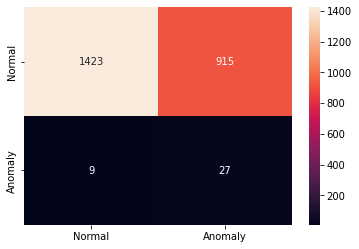

Precision score 0.75
accuracy score 0.6107834877843302
Recall score 0.028662420382165606
G-mean score 0.16876693832603143
F1 score 0.055214723926380375
sensitivity_score 0.6793199315654406
specificity_score 0.6793199315654406
Weighted accuracy 0.6793199315654406
F-statistics 0.7129123961995961
        Metric      Value
0           TP    27.0000
1           TN  1423.0000
2           FP   915.0000
3           FN     9.0000
4   Prevalence     0.4000
5     Accuracy     0.6108
6    Precision     0.0287
7          NPV     0.9937
8          FDR     0.9713
9          FOR     0.0063
10   check_Pos     1.0000
11   check_Neg     1.0000
12      Recall     0.7500
13         FPR     0.3914
14         FNR     0.2500
15         TNR     0.6086
16  check_Pos2     1.0000
17  check_Neg2     1.0000
18         LR+     1.9162
19         LR-     0.4108
20         DOR     0.0000
21          F1     0.0553
22       FBeta     0.0331
23         MCC     0.0896
24          BM     0.3586
25          MK     0.0224


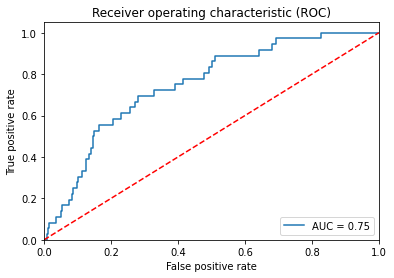

In [ ]:
from pandas.core.common import random_state
from imblearn.over_sampling import RandomOverSampler
from  sklearn.calibration  import CalibratedClassifierCV
RandomOver = RandomOverSampler(random_state=0)
X_over, y_over = RandomOver.fit_resample(X_train_m, y_train)
clf = SVC(C=5.0, kernel='rbf', tol=1e-5, max_iter=-1, random_state=42,probability=True)
clf.fit(X_over,y_over)
y_train_pred = clf.predict(X_over)

y_pred=clf.predict(X_test_m)
y_proba=clf.predict_proba(X_test_m)
precision,recall,fscore,support = clf_report(y_over,y_train_pred)
precision,recall,fscore,support = clf_report(y_test,y_pred)
clf_roc_auc(y_test,y_pred,y_proba[:,1])

Counter({-1: 7063, 1: 58})
Counter({-1: 7063, 1: 7063})
              precision    recall  f1-score   support

      Normal       0.99      0.61      0.75      2338
     Anomaly       0.03      0.75      0.06        36

    accuracy                           0.61      2374
   macro avg       0.51      0.68      0.41      2374
weighted avg       0.98      0.61      0.74      2374

[[1423  915]
 [   9   27]]


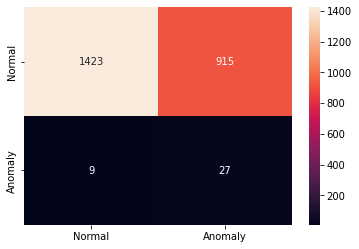

Precision score 0.75
accuracy score 0.6107834877843302
Recall score 0.028662420382165606
G-mean score 0.16876693832603143
F1 score 0.055214723926380375
sensitivity_score 0.6793199315654406
specificity_score 0.6793199315654406
Weighted accuracy 0.6793199315654406
F-statistics 0.7129123961995961
        Metric      Value
0           TP    27.0000
1           TN  1423.0000
2           FP   915.0000
3           FN     9.0000
4   Prevalence     0.4000
5     Accuracy     0.6108
6    Precision     0.0287
7          NPV     0.9937
8          FDR     0.9713
9          FOR     0.0063
10   check_Pos     1.0000
11   check_Neg     1.0000
12      Recall     0.7500
13         FPR     0.3914
14         FNR     0.2500
15         TNR     0.6086
16  check_Pos2     1.0000
17  check_Neg2     1.0000
18         LR+     1.9162
19         LR-     0.4108
20         DOR     0.0000
21          F1     0.0553
22       FBeta     0.0331
23         MCC     0.0896
24          BM     0.3586
25          MK     0.0224


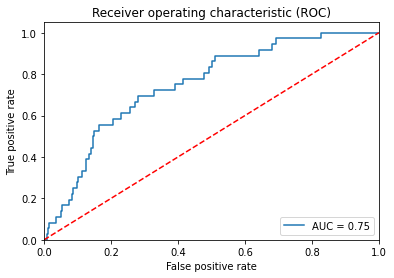

In [ ]:
from sklearn.svm import LinearSVC, SVC
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from imblearn.under_sampling import NearMiss
from  sklearn.calibration  import CalibratedClassifierCV
from imblearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import TomekLinks
model = DecisionTreeClassifier()
from imblearn.over_sampling import ADASYN

# G_mean_score=geometric_mean_score(y_test,y_pred)
print(Counter(y_train))
ratio =0.8
model = DecisionTreeClassifier()
count_over=int(ratio*7063)
# pipe1 = make_pipeline(SMOTE(sampling_strategy={1: 6000}), ADASYN(sampling_strategy={-1: 7063}))
pipe1 = make_pipeline(RandomOverSampler(sampling_strategy={1: count_over*0.7}), TomekLinks(sampling_strategy={-1:count_over*0.9}))
# X_over, y_over = pipe1.fit_resample(X_train_m, y_train)
# oversample = SMOTE(random_state=42,k_neighbors=5)
# X_over, y_over = oversample.fit_resample(X_train_m, y_train)
print(Counter(y_over))
clf = SVC(C=5.0, kernel='rbf', tol=1e-5, max_iter=-1, random_state=42,probability=True)
clf.fit(X_over,y_over)
y_train_pred = clf.predict(X_over)

y_pred=clf.predict(X_test_m)
y_proba=clf.predict_proba(X_test_m)
# precision,recall,fscore,support = clf_report(y_over,y_train_pred)
precision,recall,fscore,support = clf_report(y_test,y_pred)
clf_roc_auc(y_test,y_pred,y_proba[:,1])

              precision    recall  f1-score   support

      Normal       0.99      1.00      0.99      7063
     Anomaly       1.00      0.99      0.99      7063

    accuracy                           0.99     14126
   macro avg       0.99      0.99      0.99     14126
weighted avg       0.99      0.99      0.99     14126

[[7048   15]
 [  58 7005]]


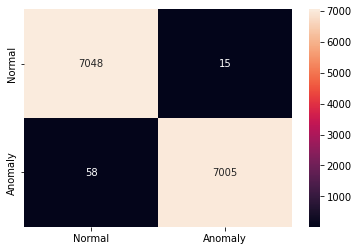

Precision score 0.991788191986408
accuracy score 0.9948322242673086
Recall score 0.9978632478632479
G-mean score 0.9948460040437994
F1 score 0.9948164453596535
sensitivity_score 0.9948322242673084
specificity_score 0.9948322242673084
Weighted accuracy 0.9948322242673084
F-statistics 0.9933078759922311
        Metric      Value
0           TP  7005.0000
1           TN  7048.0000
2           FP    15.0000
3           FN    58.0000
4   Prevalence     0.5000
5     Accuracy     0.9948
6    Precision     0.9979
7          NPV     0.9918
8          FDR     0.0021
9          FOR     0.0082
10   check_Pos     1.0000
11   check_Neg     1.0000
12      Recall     0.9918
13         FPR     0.0021
14         FNR     0.0082
15         TNR     0.9979
16  check_Pos2     1.0000
17  check_Neg2     1.0000
18         LR+   472.2857
19         LR-     0.0082
20         DOR     0.0000
21          F1     0.9948
22       FBeta     0.9971
23         MCC     0.9897
24          BM     0.9897
25          MK     0.

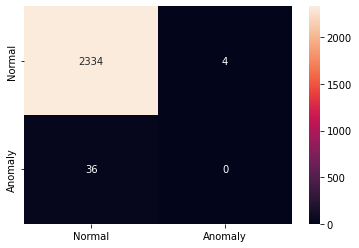

Precision score 0.0
accuracy score 0.983150800336984
Recall score 0.0
G-mean score 0.0
F1 score 0.0
sensitivity_score 0.4991445680068435
specificity_score 0.4991445680068435
Weighted accuracy 0.4991445680068435
F-statistics 0.0
        Metric      Value
0           TP     0.0000
1           TN  2334.0000
2           FP     4.0000
3           FN    36.0000
4   Prevalence     0.0000
5     Accuracy     0.9832
6    Precision     0.0000
7          NPV     0.9848
8          FDR     1.0000
9          FOR     0.0152
10   check_Pos     1.0000
11   check_Neg     1.0000
12      Recall     0.0000
13         FPR     0.0017
14         FNR     1.0000
15         TNR     0.9983
16  check_Pos2     1.0000
17  check_Neg2     1.0000
18         LR+     0.0000
19         LR-     1.0017
20         DOR     0.0000
21          F1        NaN
22       FBeta        NaN
23         MCC    -0.0051
24          BM    -0.0017
25          MK    -0.0152


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars


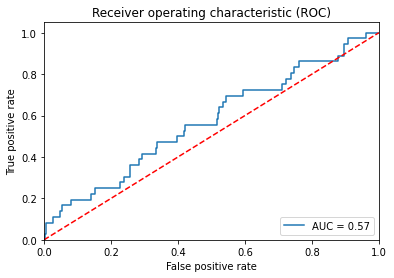

In [ ]:
from imblearn.over_sampling import SMOTEN
from  sklearn.calibration  import CalibratedClassifierCV
oversample = SMOTEN(random_state=42)
X_over, y_over = oversample.fit_resample(X_train_m, y_train)
clf = SVC(C=5.0, kernel='rbf', tol=1e-5, max_iter=-1, random_state=42,probability=True)
clf.fit(X_over,y_over)
y_train_pred = clf.predict(X_over)

y_pred=clf.predict(X_test_m)
y_proba=clf.predict_proba(X_test_m)
precision,recall,fscore,support = clf_report(y_over,y_train_pred)
precision,recall,fscore,support = clf_report(y_test,y_pred)
clf_roc_auc(y_test,y_pred,y_proba[:,1])

In [ ]:
# Oversample with SMOTE and random undersample for imbalanced dataset
from imblearn.over_sampling import SMOTEN
from sklearn.svm import LinearSVC, SVC
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean

model = DecisionTreeClassifier()
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.7)
# , ('model', model)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X_train_m, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))
# # summarize the new class distribution
# counter = Counter(y)
# print(counter)
# # scatter plot of examples by class label
# # for label, _ in counter.items():
# # 	row_ix = where(y == label)[0]
# # 	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
# # pyplot.legend()
# # pyplot.show()
# clf = SVC(C=5.0, kernel='rbf', tol=1e-5, max_iter=-1, random_state=42,probability=True)
# clf.fit(X,y)
# y_train_pred = clf.predict(X)

# y_pred=clf.predict(X_test_m)
# y_proba=clf.predict_proba(X_test_m)
# precision,recall,fscore,support = clf_report(y,y_train_pred)
# precision,recall,fscore,support = clf_report(y_test,y_pred)
# clf_roc_auc(y_test,y_pred,y_proba[:,1])

Mean ROC AUC: 0.682
